In [12]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
df1 = pd.read_csv('./Daraz FYP Dataset.csv', encoding='utf-8')
df1.head()

,Review,Sentiment,Date
0,Masha Allah Jo cheez order ki wo hee mili Love...,Positive,2022-10-14 00:00:00
1,Boht achy shoes hn jesy dekhy hn wesy hi ay hn...,Positive,2023-04-23 00:00:00
2,Same bhja ha jsa dekhaya tha....Quality b bht ...,Positive,2022-11-15 00:00:00
3,Bht zbrdst shoes hain quality b bht achi hai ❤...,Positive,2023-01-18 00:00:00
4,bht hee pyara shoes hy or quality b achi hy Ma...,Positive,2 weeks ago


In [14]:
df2 = pd.read_csv('./daraz-code-mixed-product-reviews.csv')
df2.head()

,Sentiments,Reviews
0,negative,Stuff and design was totally changed. cheap qu...
1,positive,"i got my parxel before time,sorry for late rev..."
2,positive,So far so good..... Bought it only because it ...
3,neutral,Received as described but not suitable such ha...
4,positive,Received on time and in a safely packed box. T...


In [15]:
df1 = df1.drop('Date', axis = 1)

In [16]:
df1['Sentiment'].value_counts()

Sentiment
Positive    4443
Negative    2457
Neutral     1100
Name: count, dtype: int64

In [17]:
df2['Sentiments'].value_counts()

Sentiments
positive    10167
negative     4362
neutral      2461
Name: count, dtype: int64

### balancing the Sentments and shuffling them for both dfs

In [18]:
#neutral is 1100 lowest
positive_samples = df1[df1['Sentiment'] == 'Positive'].sample(n=2457, random_state=42)
negative_samples = df1[df1['Sentiment'] == 'Negative'].sample(n=2457, random_state=42)

balanced_df = pd.concat([positive_samples, negative_samples], ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df1 = balanced_df

In [19]:
#neutral is 2461 lowest
positive_samples = df2[df2['Sentiments'] == 'positive'].sample(n=4362, random_state=42)
negative_samples = df2[df2['Sentiments'] == 'negative'].sample(n=4362, random_state=42)

balanced_df = pd.concat([positive_samples, negative_samples], ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df2 = balanced_df

In [20]:
balanced_df2.head()

,Sentiments,Reviews
0,positive,excellent product m recommended
1,positive,great wrapping sheets. Quality is very good an...
2,positive,Stuff nd fabric was lit🔥my friend was very hap...
3,negative,boht choty stars hn or shine b ni karty . pai...
4,negative,cheap fake . even not answer on giving number


### Renaming Data columns. And making both sentiments common

In [21]:
balanced_df1['Sentiment']=balanced_df1['Sentiment'].apply(lambda x: str(x).lower())

In [22]:
balanced_df1.head()

,Review,Sentiment
0,allhumndulillah again oder recive m to saya ke...,positive
1,very bad Experience... 3nu size same aaye hy o...,negative
2,kamal dupata n dress thanks,positive
3,Ya watch achi ni hy😙,negative
4,bakwas ha yar Damage shirt,negative


In [23]:
balanced_df2 = balanced_df2.rename(columns={'Reviews':'Review'})
balanced_df2.insert(2,'Sentiment',balanced_df2['Sentiments'])
balanced_df2.drop('Sentiments',axis=1,inplace=True)

In [26]:
balanced_df1['Sentiment'].value_counts()

Sentiment
positive    2457
negative    2457
Name: count, dtype: int64

In [27]:
balanced_df2['Sentiment'].value_counts()

Sentiment
positive    4362
negative    4362
Name: count, dtype: int64

### Merging two dataframes

In [28]:
mergedData = pd.concat([balanced_df1,balanced_df2]).sample(frac=1, random_state=42).reset_index(drop=True)

#### Creating more features(Num words, Num sentences and Num characters)

In [29]:
mergedData['WordLen'] = mergedData['Review'].apply(lambda x: len(x.split(' ')))
mergedData['CharLen'] = mergedData['Review'].apply(lambda x: len(x))
mergedData['SenLen'] = mergedData['Review'].apply(lambda x: len(x.split('.')))

## Importing NLTK and its functionalities

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# Download NLTK stopwords data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\093a2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\093a2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\093a2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### For urdu words

In [34]:
UrduList = []
with open('./Urdustopwords.txt','r') as f:
    for word in f:
        UrduList.append(word.split('\n')[0])
UrduList.append('ha')
Updated = []
for i in UrduList:
    if i == 'acha':
        continue
    else:
        Updated.append(i)
        
UrduList = Updated

In [35]:
print(UrduList,end=" ")

['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh ', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye ', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou', 'ha'] 

In [36]:
def tokenize_and_remove_stopwords(review):
    # Tokenize the review into words
    words = word_tokenize(review)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    stop_words.remove('not')
    
    # Initialize WordNet Lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Lemmatize and filter words
    filtered_words = [
        lemmatizer.lemmatize(word.lower())  # Lemmatize each word
        for word in words
        if (
            word.lower() not in stop_words  # Exclude stopwords
            and word.isalnum()  # Include only alphanumeric words
            and len(word) > 1  # Exclude single-character words
            and word.lower() not in UrduList  # Exclude words in UrduList
        )
    ]

    return filtered_words

In [37]:
mergedData['Tokenized_Review'] = mergedData['Review'].apply(tokenize_and_remove_stopwords)

## Data Visualization

- Frequency of Most Common Words

In [38]:
MostUsedWordsPostive = []
MostUsedWordsNegetive = []

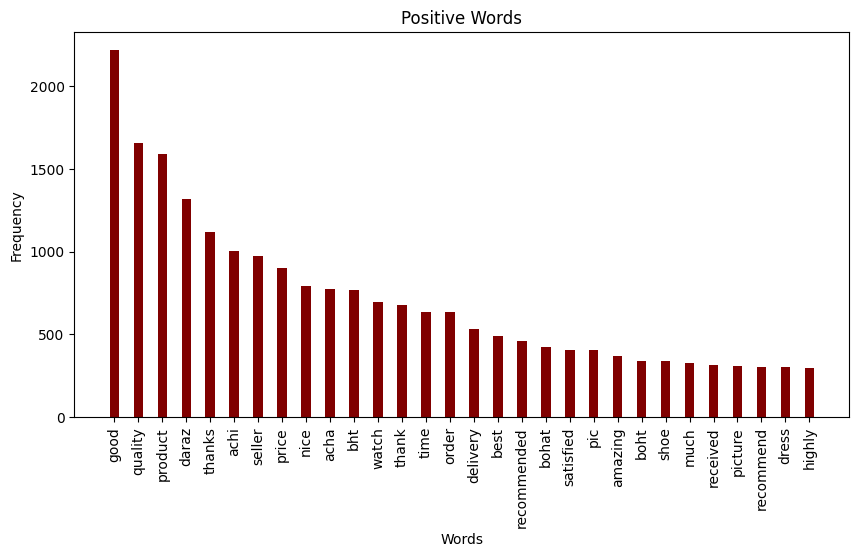

In [39]:
for comments in mergedData[mergedData['Sentiment']=='positive']['Tokenized_Review']:
    for words in comments:
        MostUsedWordsPostive.append(words)
from collections import Counter
PosCommon=pd.DataFrame(Counter(MostUsedWordsPostive).most_common(30))
fig = plt.figure(figsize = (10, 5))
plt.bar(PosCommon[0],PosCommon[1],color ='maroon', width = 0.4)
plt.xticks(rotation=90)
plt.title('Positive Words')
plt.xlabel("Words")
plt.ylabel('Frequency')
plt.show()

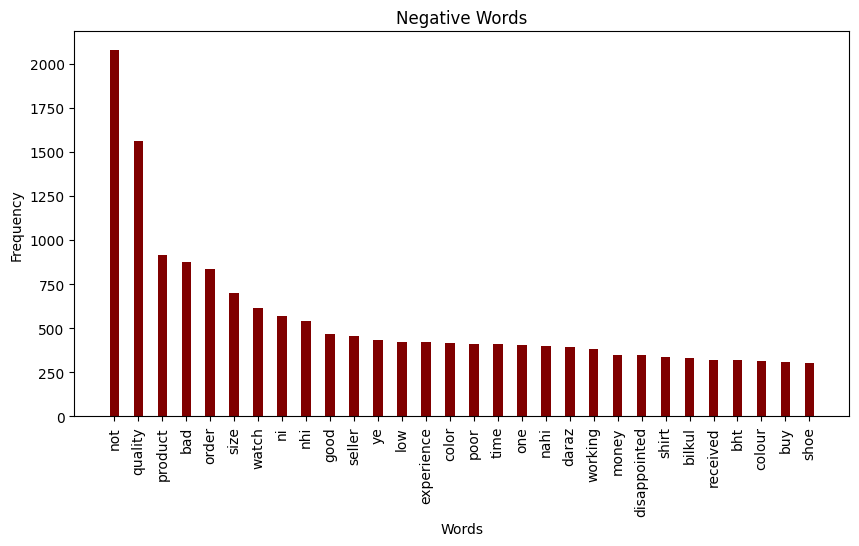

In [40]:
for comments in mergedData[mergedData['Sentiment']=='negative']['Tokenized_Review']:
    for words in comments:
        MostUsedWordsNegetive.append(words)
from collections import Counter
NegCommon=pd.DataFrame(Counter(MostUsedWordsNegetive).most_common(30))
fig = plt.figure(figsize = (10, 5))
plt.bar(NegCommon[0],NegCommon[1],color ='maroon', width = 0.4)
plt.xticks(rotation=90)
plt.title('Negative Words')
plt.xlabel("Words")
plt.ylabel('Frequency')
plt.show()

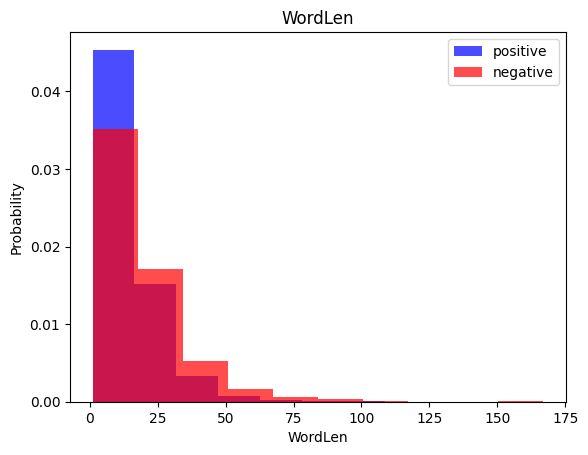

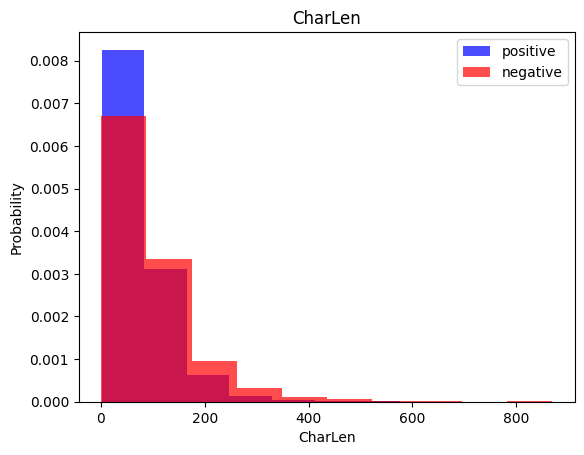

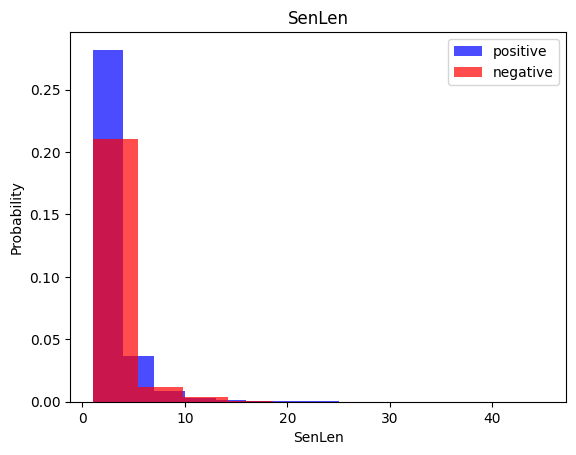

In [41]:
for features in mergedData.columns[2:-1]:
    plt.hist(mergedData[mergedData["Sentiment"]=='positive'][features], color='blue', label='positive', alpha=0.7, density=True)
    plt.hist(mergedData[mergedData["Sentiment"]=='negative'][features], color='red', label='negative', alpha=0.7, density=True)
    plt.title(features)
    plt.ylabel("Probability")
    plt.xlabel(features)
    plt.legend()
    plt.show()

### Word Cloud

In [42]:
from wordcloud import WordCloud

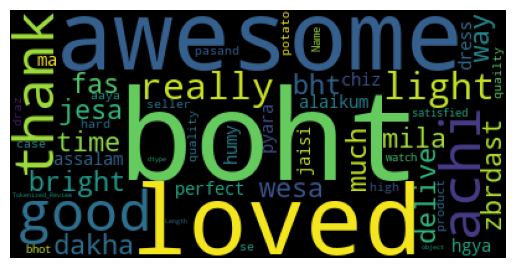

In [43]:
p=mergedData[mergedData["Sentiment"]=='positive']['Tokenized_Review']
wordcloud2 = WordCloud().generate(str(p))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

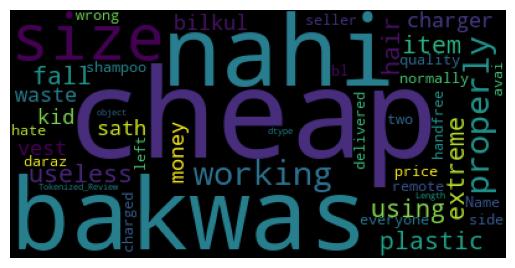

In [44]:
p=mergedData[mergedData["Sentiment"]=='negative']['Tokenized_Review']
wordcloud2 = WordCloud().generate(str(p))
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [45]:
#merging tokenized data for vectorization
mergedData['Modified_review'] = mergedData['Tokenized_Review'].apply(lambda x: " ".join(x))

In [46]:
mergedData.head()

,Review,Sentiment,WordLen,CharLen,SenLen,Tokenized_Review,Modified_review
0,extreme hair fall after using that,negative,6,34,1,"[extreme, hair, fall, using]",extreme hair fall using
1,I really loved these lights and they are brigh...,positive,21,121,3,"[really, loved, light, bright, time, also, fas...",really loved light bright time also fastt comp...
2,bht zbrdast jesa dakha wesa Mila or deliver b ...,positive,16,85,1,"[bht, zbrdast, jesa, dakha, wesa, mila, delive...",bht zbrdast jesa dakha wesa mila deliver fast ...
3,cheap plastic useless,negative,3,21,1,"[cheap, plastic, useless]",cheap plastic useless
4,Bakwas item hai,negative,4,16,1,"[bakwas, item]",bakwas item


## Preparing Data for model

In [47]:
def NumSentiments(sentiment):
    if sentiment =='positive':
        return 1
    else:
        return 0
mergedData['NumSentiment'] = mergedData['Sentiment'].apply(NumSentiments)

#### Spliting data for train test

In [48]:
from sklearn.model_selection import train_test_split
training, testing = train_test_split(mergedData,test_size=0.2,random_state=42)
train_x = training['Modified_review']
train_y = training['NumSentiment']
test_x = testing['Modified_review']
test_y = testing['NumSentiment']

#### Feature Extraction using TFIDFVectorizor

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

### Classifcation

#### SVC

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Assuming train_x_vectors and train_y are your training data and labels

# Define the parameter grid to search
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': [0.1, 1, 'auto']}

# Create an SVM model with a linear kernel
svc_model = SVC()

# Create GridSearchCV
grid_search = GridSearchCV(svc_model, param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(train_x_vectors, train_y)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [50]:
from sklearn.svm import SVC
svcModel = SVC(C=1,gamma=1,kernel='rbf',probability=True)
svcModel.fit(train_x_vectors, train_y)

SVC(C=1, gamma=1, probability=True)

#### DecisionTree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtcModel = DecisionTreeClassifier(random_state=42)
dtcModel.fit(train_x_vectors,train_y)

DecisionTreeClassifier(random_state=42)

#### Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()
nbModel.fit(train_x_vectors.toarray(),train_y)

GaussianNB()

#### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(train_x_vectors,train_y)

KNeighborsClassifier(n_neighbors=3)

#### Logistic Regression

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Assuming train_x_vectors and train_y are your training data and labels

# Define the parameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Create GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(train_x_vectors, train_y)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)


C:\Users\093a2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\093a2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\093a2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\093a2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\093a2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


C:\Users\093a2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [51]:
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression(C=10,penalty='l2',solver='liblinear')
lrModel.fit(train_x_vectors,train_y)

LogisticRegression(C=10, solver='liblinear')

#### RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier()
rfModel.fit(train_x_vectors,train_y)

RandomForestClassifier()

#### mnbModel

In [45]:
from sklearn.naive_bayes import MultinomialNB
mnbModel = MultinomialNB()
mnbModel.fit(train_x_vectors,train_y)

MultinomialNB()

#### XGBClassifier

In [46]:
from xgboost import XGBClassifier
xgbModel = XGBClassifier()
xgbModel.fit(train_x_vectors,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### LGBMClassifier

## Evalulation

In [47]:
print("svcModel: ",svcModel.score(test_x_vectors,test_y))
print("knnModel: ",knnModel.score(test_x_vectors,test_y))
print("DEcisonTreeClassifierModel: ",dtcModel.score(test_x_vectors,test_y))
print("naiveBayesModel: ",nbModel.score(test_x_vectors.toarray(),test_y))
print("LogisticRegressionModel: ",lrModel.score(test_x_vectors,test_y))
print("RandomForestModel: ",rfModel.score(test_x_vectors,test_y))
print("MultiNomialNaiveBayesbModel: ",mnbModel.score(test_x_vectors,test_y))
print("xgbModel: ",xgbModel.score(test_x_vectors,test_y))


svcModel:  0.9534457478005866
knnModel:  0.7085777126099707
DEcisonTreeClassifierModel:  0.908724340175953
naiveBayesModel:  0.7342375366568915
LogisticRegressionModel:  0.9527126099706745
RandomForestModel:  0.9406158357771262
MultiNomialNaiveBayesbModel:  0.9420821114369502
xgbModel:  0.9266862170087976


### Learning Curve

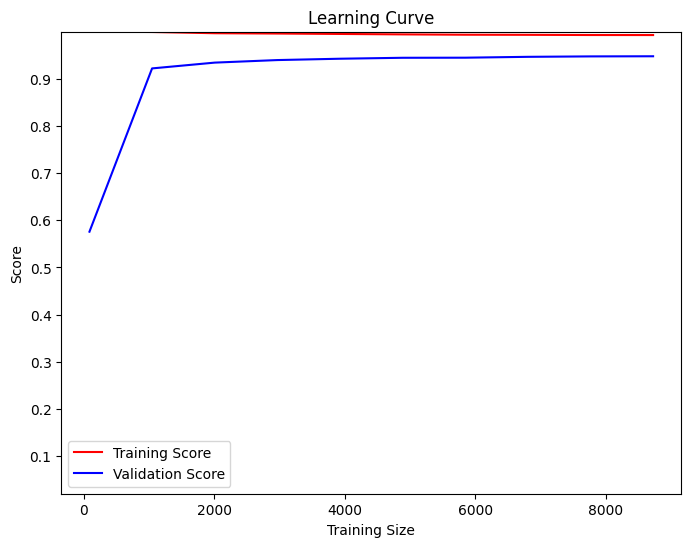

In [52]:
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, vectorized_train_X, vectorized_test_X, train_y, test_y):
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, vectorized_train_X, train_y, cv=5, n_jobs=-1,
                       train_sizes=np.linspace(0.01, 1.0, 10), return_times=True)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='r')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score', color='b')
    
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.yticks([.1, .2, .3, .4, 0.5,.6,.7,.8,.9,10])
    plt.ylim(0.02, 1.0)  # Adjust the y-axis limits for better visualization
    plt.legend()
    plt.show()
plot_learning_curve(svcModel,train_x_vectors,test_x_vectors,train_y,test_y)
# Example usage:
# Assuming vectorized_train_X, vectorized_test_X are your TF-IDF or other vectorized features
# train_y and test_y are your binary labels


In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve,hinge_loss
# Accuracy
y_pred = svcModel.predict(test_x_vectors)
y_test = test_y

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

hinge_loss_value = hinge_loss(y_test, svcModel.decision_function(test_x_vectors))
print(f'Hinge Loss: {hinge_loss_value:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Precision, Recall, F1 Score
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

# ROC/AUC
roc_auc = roc_auc_score(y_test, svcModel.predict_proba(test_x_vectors)[:, 1])
print(f'ROC/AUC Score: {roc_auc:.4f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svcModel.predict_proba(test_x_vectors)[:, 1])
# Plot ROC curve as needed


Accuracy: 0.9542
Hinge Loss: 0.2090
Confusion Matrix:
[[1335   43]
 [  82 1268]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1378
           1       0.97      0.94      0.95      1350

    accuracy                           0.95      2728
   macro avg       0.95      0.95      0.95      2728
weighted avg       0.95      0.95      0.95      2728

ROC/AUC Score: 0.9882


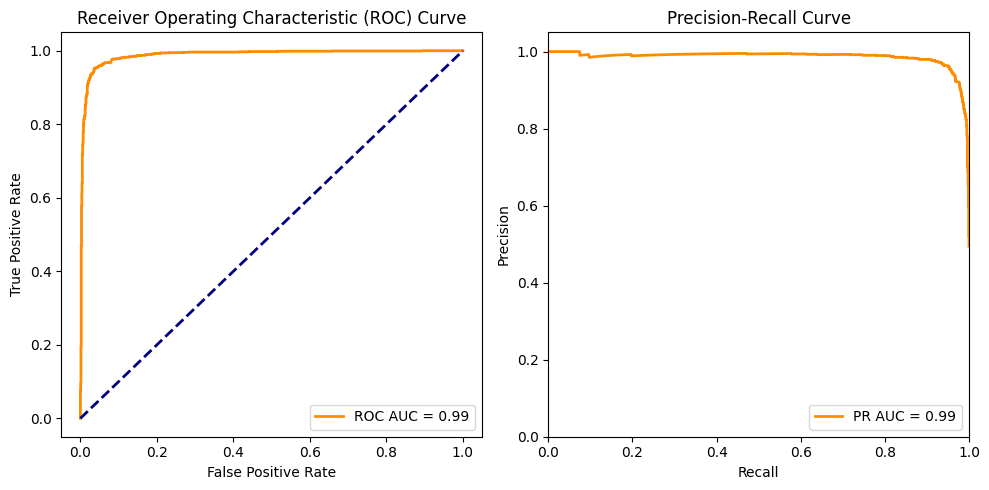

In [100]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Assuming you already have y_test and y_scores from your model
y_scores = svcModel.decision_function(test_x_vectors)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

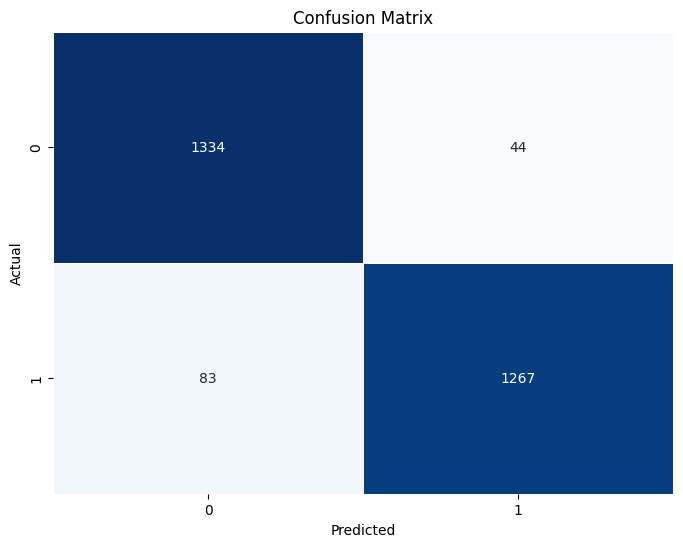

In [51]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Assuming you have y_test and y_pred from your model
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a seaborn heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test the model yourself!!!

In [103]:
testset = ['I am delighted to say that I am totally satistfied with this great product']
newtest = vectorizer.transform(testset)
result = svcModel.predict(newtest)
if result == 1:
    print("Positive")
else:
    print('Negative')

Positive


In [53]:
#Saving the two best models
#import pickle
#with open('./svcModel.pickle','wb') as f:
#    pickle.dump(nbModel, f)